In [835]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score


import seaborn as sns
import matplotlib.pyplot as plt

In [836]:
df = pd.read_csv('/Users/pranavbidve/Documents/AML/Final Project/mental-health-prediction/data/data.csv')
df.head()

,Unnamed: 0.1,StateAbbr,StateDesc,CountyName,CountyFIPS,TractFIPS,TotalPopulation,TotalPop18plus,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,...,D3APO,D4A,D4C,D4D,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI
0,0,NY,New York,Albany,36001,36001000100,2073,1507,12.2,28.7,...,0.081900,0.990340,0.990502,0.608667,0.052916,0.044596,0.027136,0.053216,0.049366,0.799864
1,1,NY,New York,Albany,36001,36001000201,3125,2314,10.9,24.9,...,0.128381,0.781805,0.781949,0.481601,0.041881,0.041040,0.022724,0.047323,0.042171,0.649692
2,2,NY,New York,Albany,36001,36001000202,2598,1756,10.8,26.7,...,0.043570,0.396692,0.396177,0.243470,0.020306,0.017547,0.009811,0.018994,0.018944,0.306940
3,3,NY,New York,Albany,36001,36001000301,3190,2189,11.1,26.6,...,0.105913,0.997369,0.990393,0.608603,0.046016,0.040432,0.016988,0.039075,0.042929,0.695568
4,4,NY,New York,Albany,36001,36001000302,3496,2956,6.3,22.2,...,0.010392,0.000000,0.000000,0.000000,0.001049,0.001796,0.000000,0.000000,0.081016,0.160011


In [837]:
df.drop(['Unnamed: 0.1', 'StateAbbr', 'StateDesc', 'CountyFIPS', 'Geolocation', 'FUNCSTAT', 'MTFCC', 'GEOIDFQ', 'BLKGRPCE_y'], axis = 1, inplace = True)
df.dropna(axis = 0)

,CountyName,TractFIPS,TotalPopulation,TotalPop18plus,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,...,D3APO,D4A,D4C,D4D,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI
0,Albany,36001000100,2073,1507,12.2,28.7,15.5,5.2,13.9,6.9,...,0.081900,0.990340,0.990502,0.608667,0.052916,0.044596,0.027136,0.053216,0.049366,0.799864
5,Albany,36001000401,2216,2065,4.8,40.6,12.6,15.9,10.1,13.0,...,0.039955,0.992566,0.990417,0.608562,0.044544,0.037201,0.014688,0.035874,0.041556,0.673325
6,Albany,36001000403,4418,3846,5.5,24.6,20.1,7.7,10.6,5.9,...,0.079227,0.992155,0.990601,0.608746,0.059032,0.050245,0.026872,0.053609,0.055072,0.892322
8,Albany,36001000501,3440,2664,11.6,28.6,15.6,5.7,12.9,7.9,...,0.079462,0.991771,0.990631,0.610496,0.047783,0.038677,0.029839,0.061080,0.044577,0.722279
9,Albany,36001000502,2841,2575,8.0,14.4,21.9,3.3,12.0,3.5,...,0.144490,0.989677,0.990714,0.609897,0.052684,0.041665,0.029286,0.056412,0.049150,0.796359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5278,Wyoming,36121970900,1972,1588,5.1,28.7,19.7,9.5,10.5,6.7,...,0.015065,0.000000,0.000000,0.000000,0.001019,0.001802,0.000000,0.000000,0.000000,0.000000
5279,Wyoming,36121971000,4187,3282,5.4,30.1,18.9,9.5,10.9,7.4,...,0.014067,0.000000,0.000000,0.000000,0.001724,0.002681,0.000000,0.000000,0.000000,0.000000
5280,Wyoming,36121971100,2482,1918,6.8,32.6,17.8,9.9,11.3,8.7,...,0.009324,0.000000,0.000000,0.000000,0.000776,0.001676,0.000000,0.000000,0.000000,0.000000
5283,Yates,36123150200,5791,4310,7.7,31.2,17.6,9.9,11.3,8.6,...,0.013457,0.000000,0.000000,0.000000,0.002393,0.003360,0.000000,0.000000,0.001084,0.023020


In [838]:
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [839]:
df[categorical_columns]

,CountyName,NAMELSAD
0,Albany,Block Group 1
1,Albany,Block Group 2
2,Albany,Block Group 2
3,Albany,Block Group 1
4,Albany,Block Group 1
...,...,...
5284,Yates,Block Group 3
5285,Yates,Block Group 1
5286,Yates,Block Group 1
5287,Yates,Block Group 1


In [840]:
final_df = df[np.hstack(df[numerical_columns]+df[categorical_columns])]
final_df.dropna(inplace = True)

/var/folders/_j/339x85hx3692z04svrrjjb380000gn/T/ipykernel_42971/4118733649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace = True)


In [841]:
y = final_df['MHLTH_CrudePrev']
X = final_df.drop('MHLTH_CrudePrev', axis = 1)

In [842]:
numerical_columns = X.select_dtypes(include=['number']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

In [843]:
numerical_columns_loc = [X.columns.get_loc(i) for i in numerical_columns]

categorical_columns_loc = [X.columns.get_loc(i) for i in categorical_columns]

In [844]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2)

In [860]:

preprocessor = make_column_transformer(
    (StandardScaler(), numerical_columns_loc),  
    (OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), categorical_columns_loc),  
    remainder='passthrough'  
)

linear_reg_pipe = make_pipeline(
    preprocessor,
    LinearRegression()
    
)


ridge_pipe = make_pipeline(
    preprocessor,
    Ridge(alpha=1.0) 
)


lasso_pipe = make_pipeline(
    preprocessor,
    Lasso(alpha=1.0)  
)



In [861]:

linear_scores = cross_val_score(lasso_pipe, X_dev, y_dev, cv=5)
print("Linear Regression Cross-Validation Scores:", linear_scores)
print("Mean Linear Regression CV Score:", np.mean(linear_scores))

Linear Regression Cross-Validation Scores: [-0.0044635  -0.00230932 -0.00073394 -0.00013571 -0.0005974 ]
Mean Linear Regression CV Score: -0.0016479744915728566


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [862]:
ridge_scores = cross_val_score(ridge_pipe, X_dev, y_dev, cv=5)
print("Ridge Regression Cross-Validation Scores:", ridge_scores)
print("Mean Ridge Regression CV Score:", np.mean(ridge_scores))

Ridge Regression Cross-Validation Scores: [0.99234791 0.99408669 0.99235304 0.99310855 0.99488129]
Mean Ridge Regression CV Score: 0.9933554954311024


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [863]:
lasso_scores = cross_val_score(lasso_pipe, X_dev, y_dev, cv=5)
print("Lasso Regression Cross-Validation Scores:", lasso_scores)
print("Mean Lasso Regression CV Score:", np.mean(lasso_scores))

Lasso Regression Cross-Validation Scores: [-0.0044635  -0.00230932 -0.00073394 -0.00013571 -0.0005974 ]
Mean Lasso Regression CV Score: -0.0016479744915728566


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


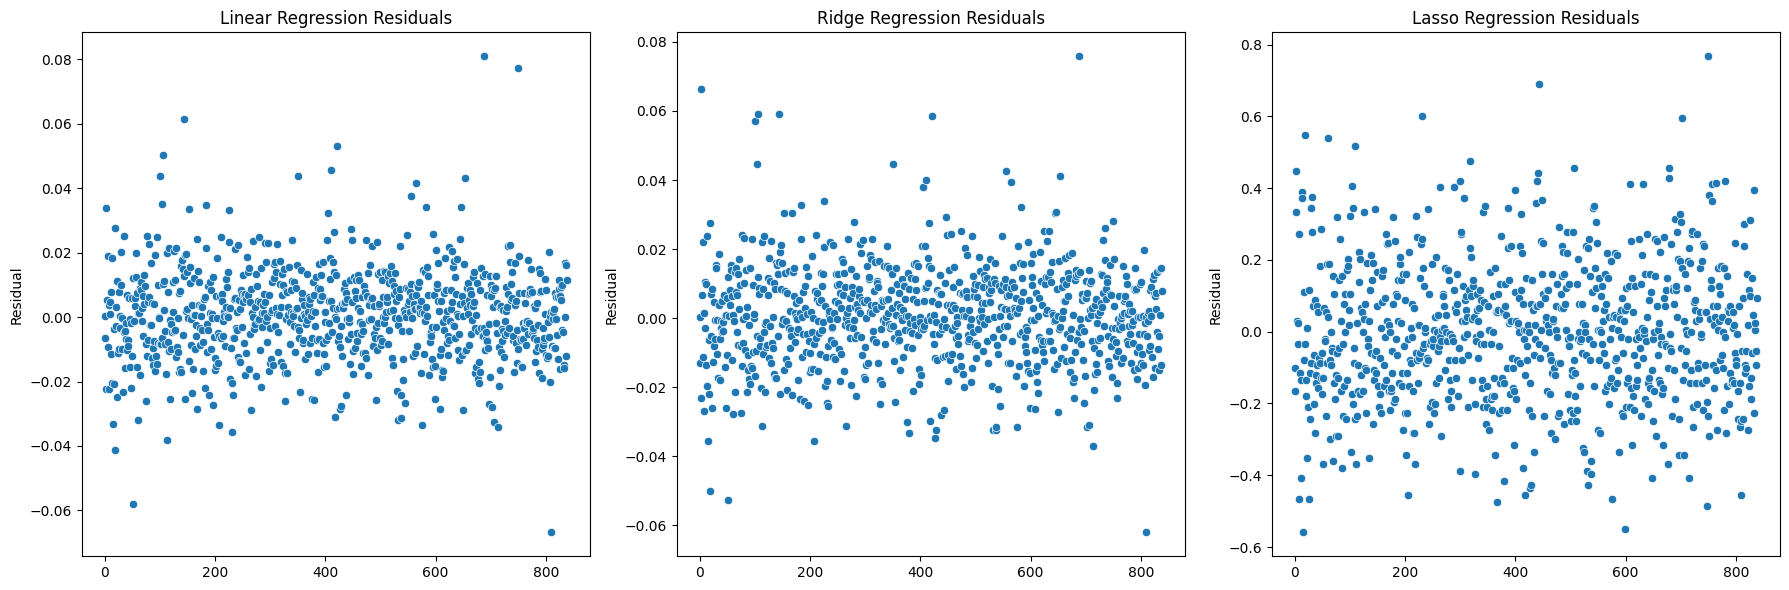

In [864]:
linear_reg_pipe.fit(X_dev, y_dev)
ridge_pipe.fit(X_dev, y_dev)
lasso_pipe.fit(X_dev, y_dev)

lr_pred = linear_reg_pipe.predict(X_test)
ridge_pred = ridge_pipe.predict(X_test)
lasso_pred = lasso_pipe.predict(X_test)

lr_residuals = y_test - lr_pred
ridge_residuals = y_test - ridge_pred
lasso_residuals = y_test - lasso_pred

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x=np.arange(len(lr_residuals)), y=lr_residuals, ax=ax[0])
ax[0].set_ylabel("Residual")
ax[0].set_title("Linear Regression Residuals")

sns.scatterplot(x=np.arange(len(ridge_residuals)), y=ridge_residuals, ax=ax[1])
ax[1].set_ylabel("Residual")
ax[1].set_title("Ridge Regression Residuals")

sns.scatterplot(x=np.arange(len(lasso_residuals)), y=lasso_residuals, ax=ax[2])
ax[2].set_ylabel("Residual")
ax[2].set_title("Lasso Regression Residuals")

plt.tight_layout()
plt.show()



1. **Linear Regression Residuals**: The residuals are evenly scattered around zero, indicating a good fit with no obvious bias. However, the spread is somewhat wide, suggesting the model may not capture all complexities.

2. **Ridge Regression Residuals**: The residuals are similarly scattered but with a tighter spread, indicating better control over overfitting due to regularization. This suggests it generalizes slightly better than Linear Regression.

3. **Lasso Regression Residuals**: The residuals have a wider spread compared to Ridge, indicating potential underfitting due to Lasso's aggressive feature selection. This suggests it may be overlooking some important patterns in the data.

# Overall, ridge pregression performs the best.